# Initialize

In [ ]:
import os
from time import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
sys.path.append('..\\')
# from scresonators.fit_resonator.ana_resonator import ResonatorFitter
# from scresonators.fit_resonator.ana_resonator import ResonatorData
# import csv
# from datetime import datetime
from scresonators.measurement import vna_measurement
from scresonators.measurement import helpers
from scresonators.measurement import vna_scan
%load_ext autoreload
%autoreload 2

helpers.config_figs()

import scresonators.measurement.vna_measurement
from scresonators.measurement.ZNB import ZNB20

#VNA = ZNB20(address='10.108.30.65') # Stanford
VNA = ZNB20(address='192.168.137.84') # SLAC

## Daily measurement settings
warm_att = 0 #dB
cold_att = 50

#spar = 's21'
#base_path = r'C:/_Data/Resonators/20250818-S042A'

spar = 's43'
base_path = r'C:/_Data/Resonators/20250818-S042B'

# spar = 's43'
# base_path = r'G:/My Drive/Projects/Materials/Data/250518-ResSilTa3_cooldown2'

# spar = 's43'
# base_path = r'G:/My Drive/Projects/Materials/Data/250605_check_lines/'


if not os.path.exists(base_path):
    os.makedirs(base_path)

No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.


In [ ]:
VNA.reset()

# Single power scans

## Single scan

Calculated line delay: -3.7046546557444755e-07


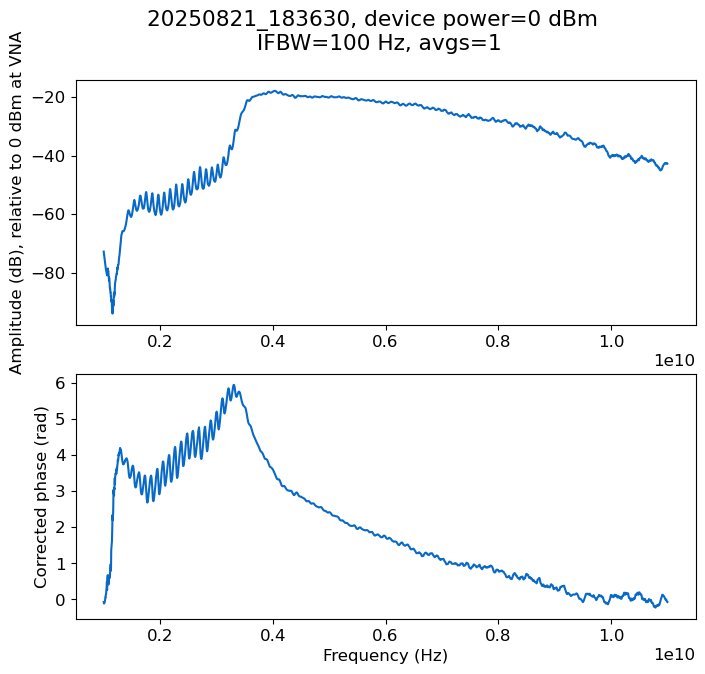

In [20]:
expt_path = base_path
scan_def = {'freq_center':6e9, 
            'span':10e9,  
            'bandwidth':100, 
            'power':0, 
            'npoints':3000, 
            'averages':1}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 'A12-C11_main'
data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, 's21')

Calculated line delay: -4.050760380477675e-07


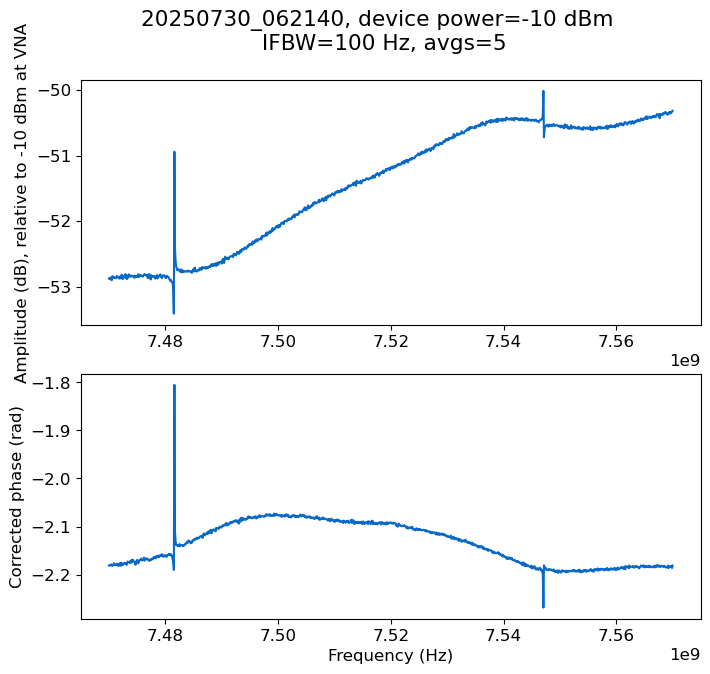

In [40]:
expt_path = base_path
scan_def = {'freq_center':7.52e9, 
            'span':0.1e9,  
            'bandwidth':100, 
            'power':-10, 
            'npoints':1000, 
            'averages':5}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 'check1'
data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)

Calculated line delay: 1.4295633528070143e-08


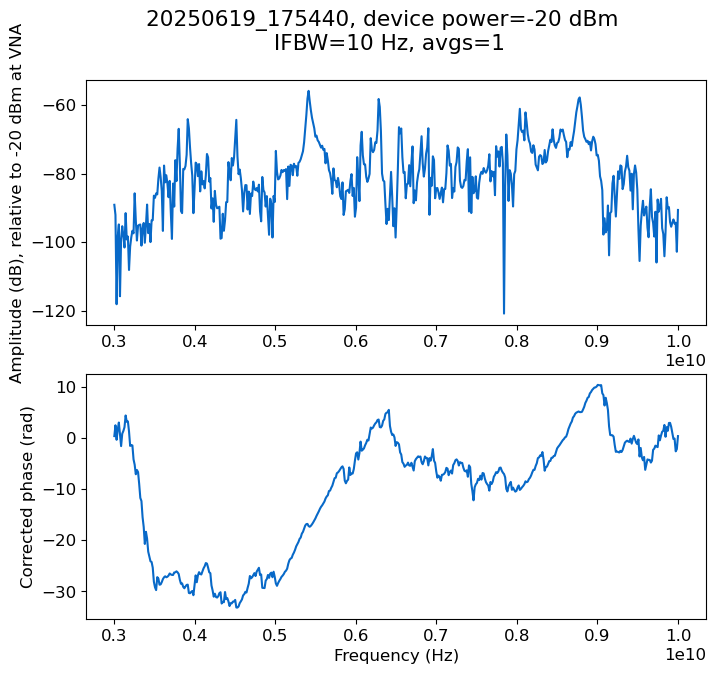

In [259]:
expt_path = base_path
scan_def = {'freq_center':6.5e9, 
            'span':7e9,  
            'bandwidth':10, 
            'power':-20, 
            'npoints':500, 
            'averages':1}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 'S41'
data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, 's41')

Calculated line delay: -3.7483372747773653e-07


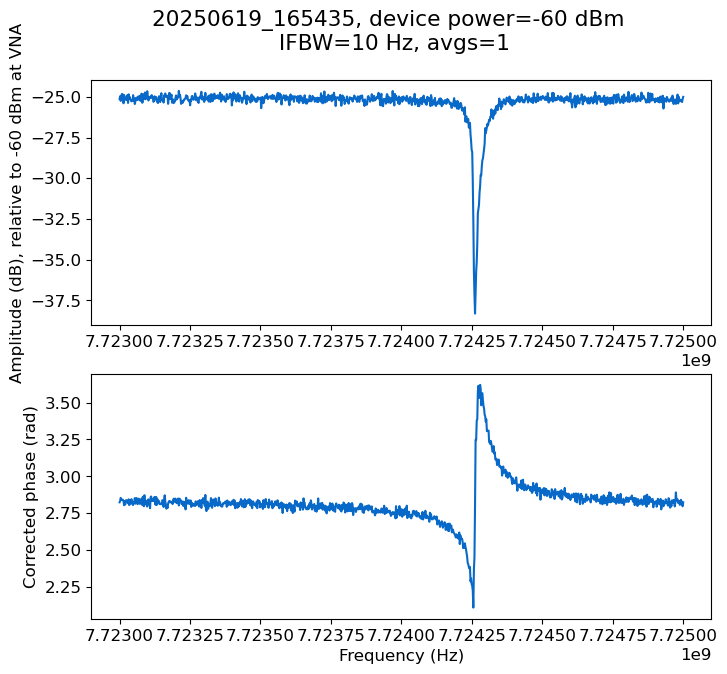

In [233]:
expt_path = base_path
scan_def = {'freq_center':7.72425e9, 
            'span':0.5e6,  
            'bandwidth':10, 
            'power':-60, 
            'npoints':1000, 
            'averages':1}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 'waste'
data2=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, 's43')


-60.0
Calculated line delay: -3.6587005147674795e-07


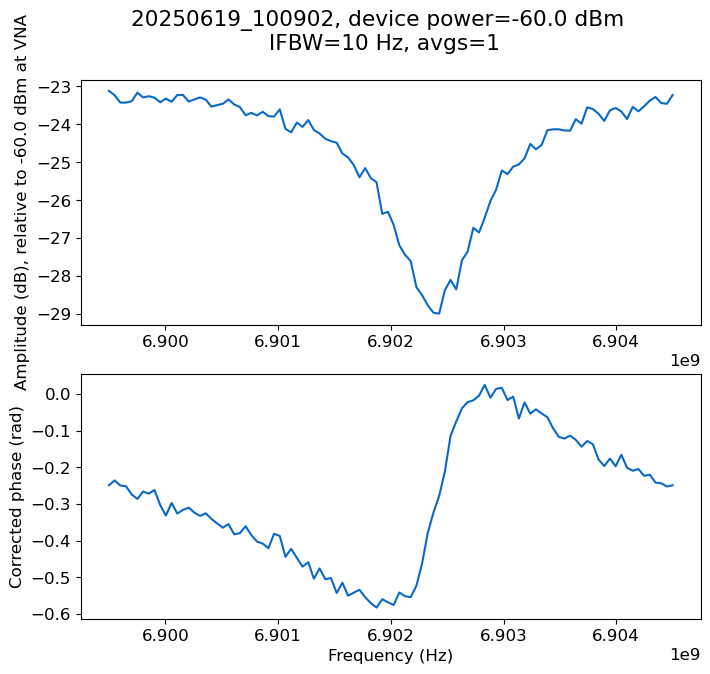

-59.5
Calculated line delay: -3.669391446264224e-07


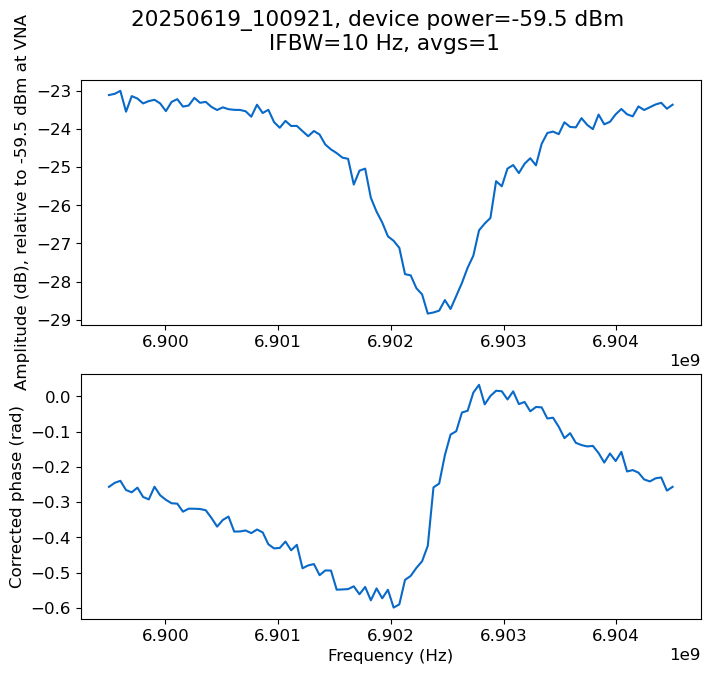

-59.0
Calculated line delay: -3.694845912781622e-07


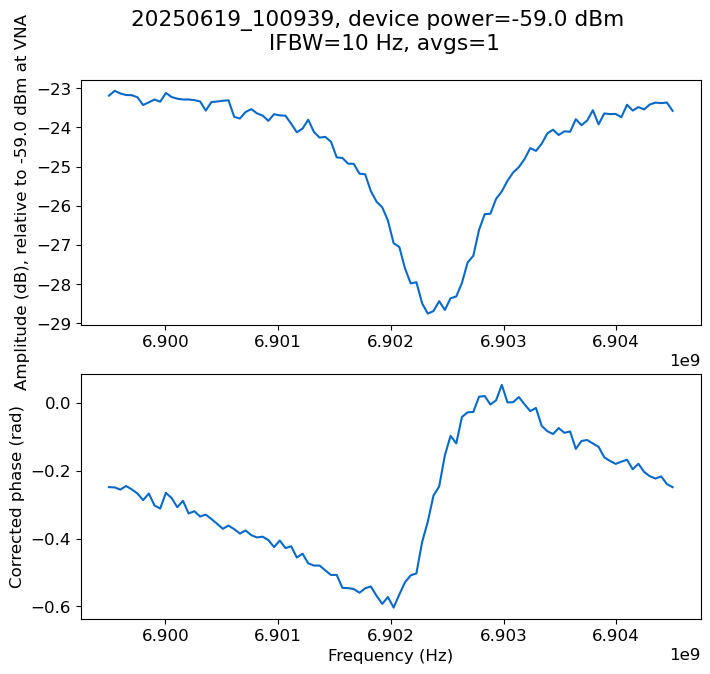

-58.5
Calculated line delay: -3.702146742996135e-07


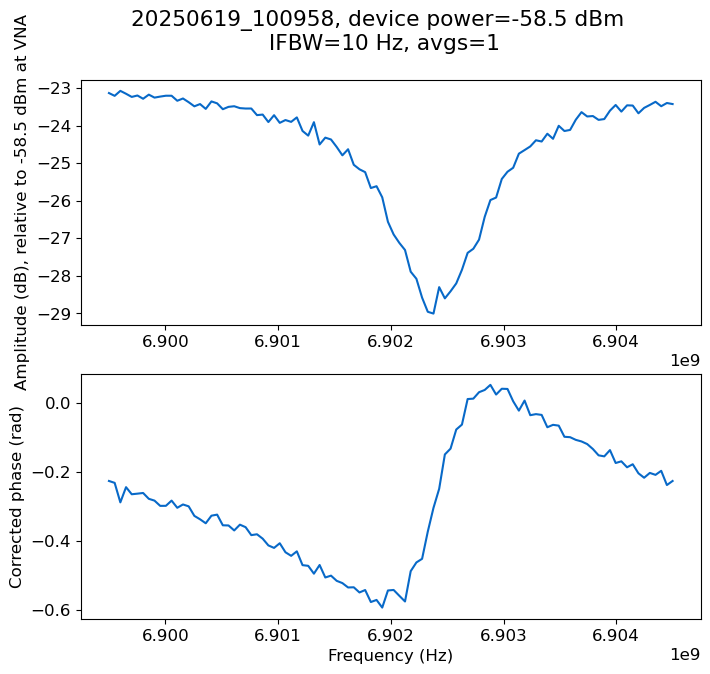

-58.0
Calculated line delay: -3.673445358038707e-07


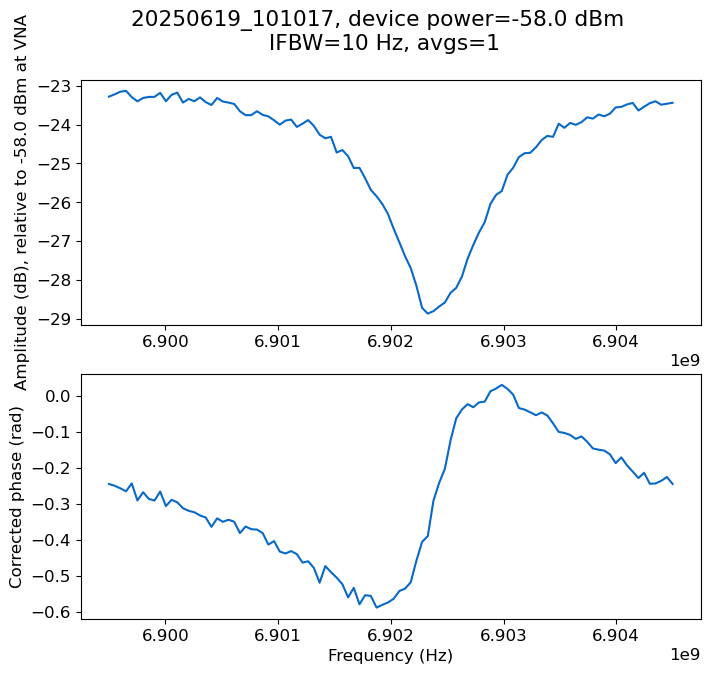

-57.5
Calculated line delay: -3.672839594294203e-07


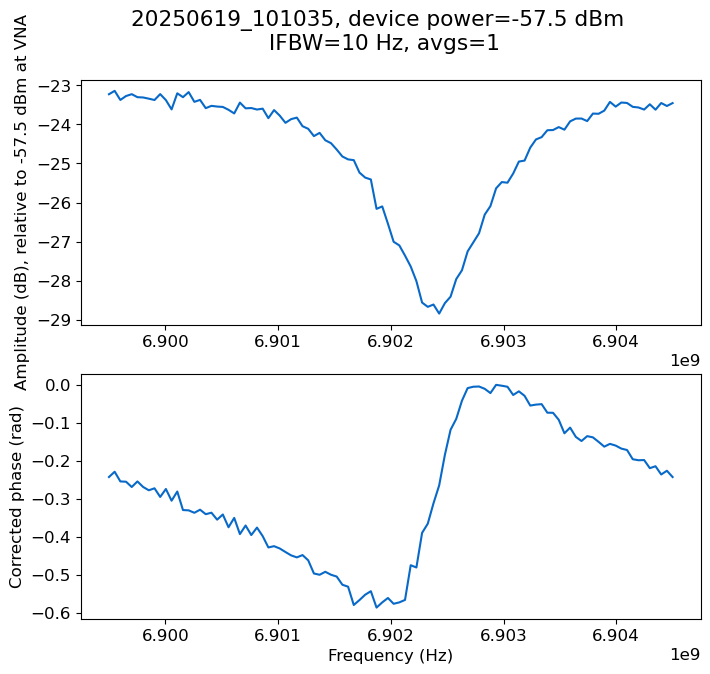

-57.0
Calculated line delay: -3.712483983012751e-07


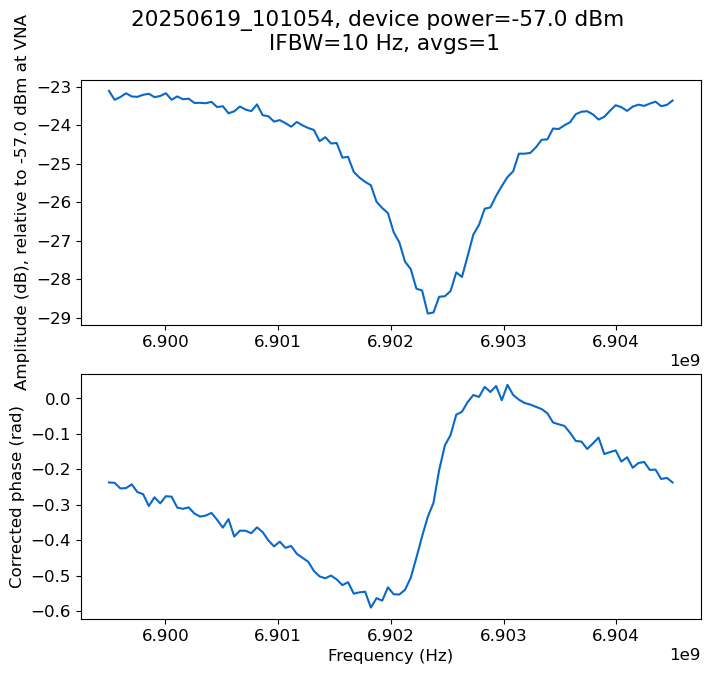

-56.5
Calculated line delay: -3.67958622596817e-07


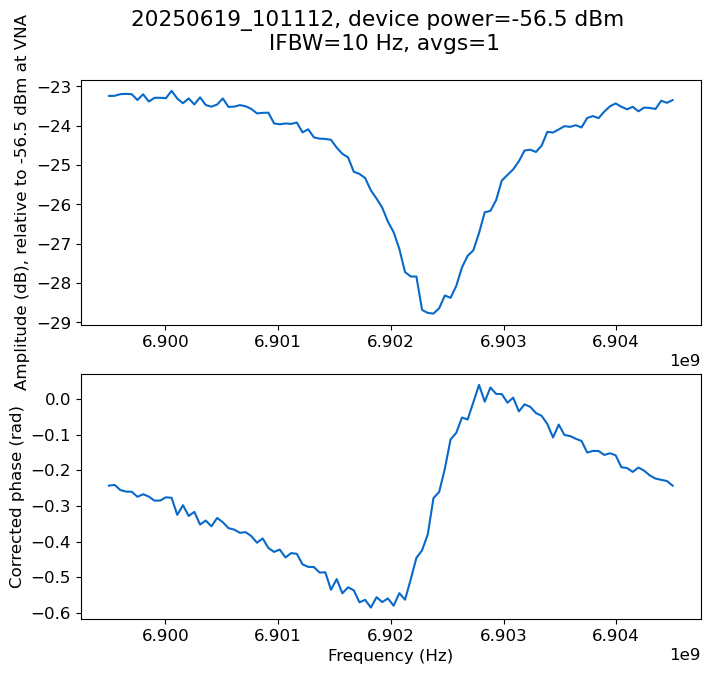

-56.0
Calculated line delay: -3.6684077760954607e-07


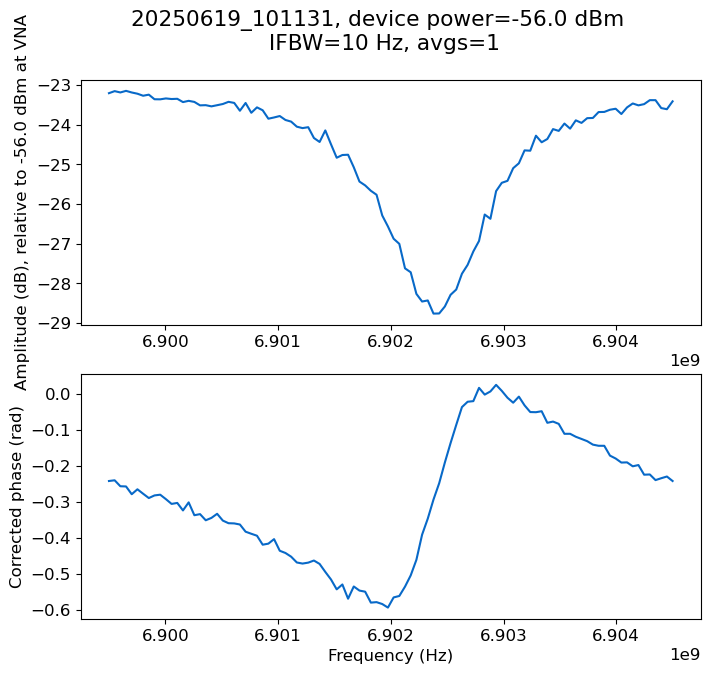

-55.5
Calculated line delay: -3.6579333651887896e-07


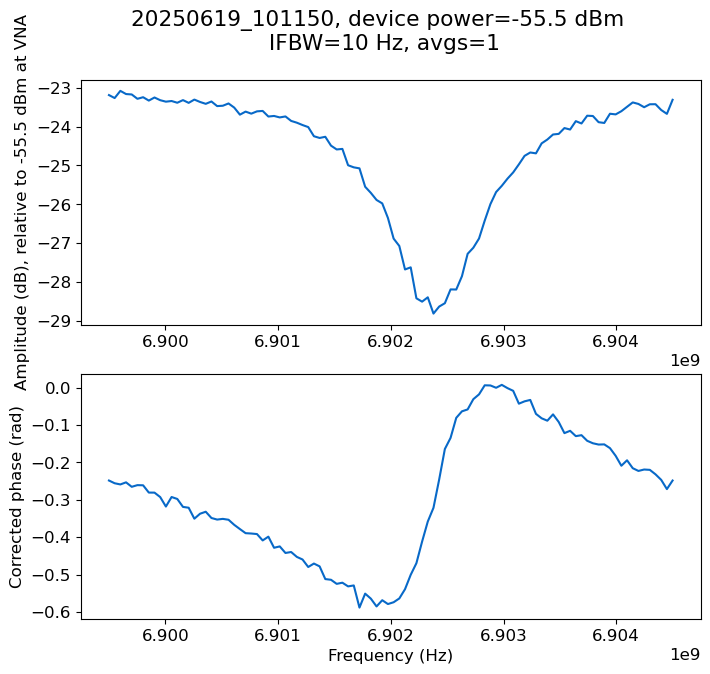

-55.0
Calculated line delay: -3.72370797265507e-07


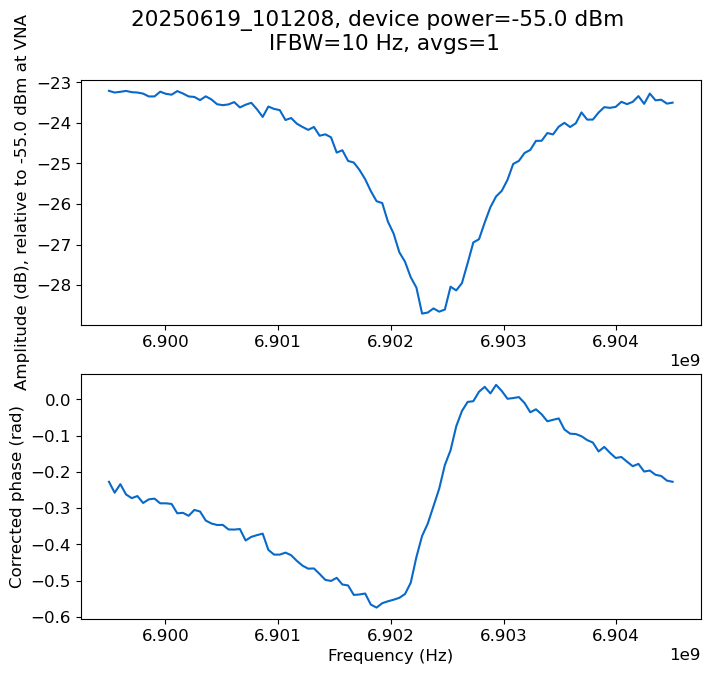

-54.5
Calculated line delay: -3.673767536637722e-07


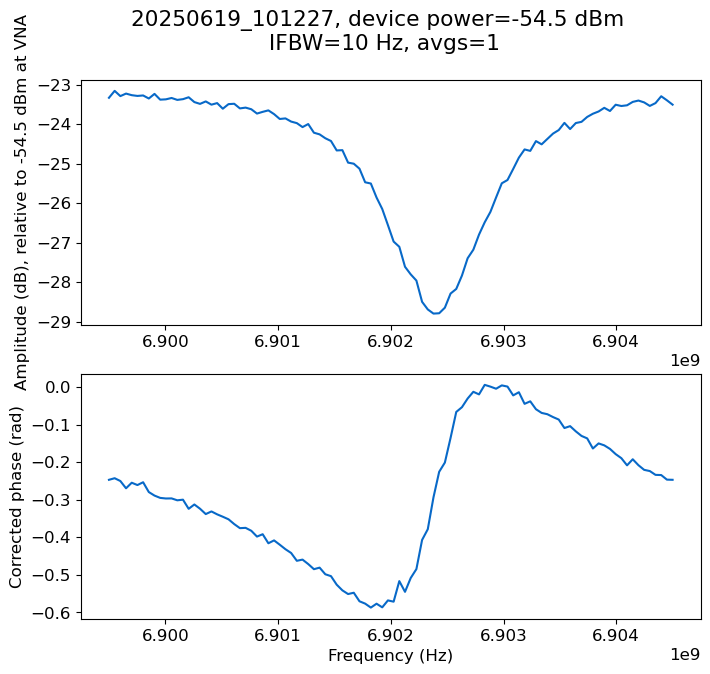

-54.0
Calculated line delay: -3.6763342935832386e-07


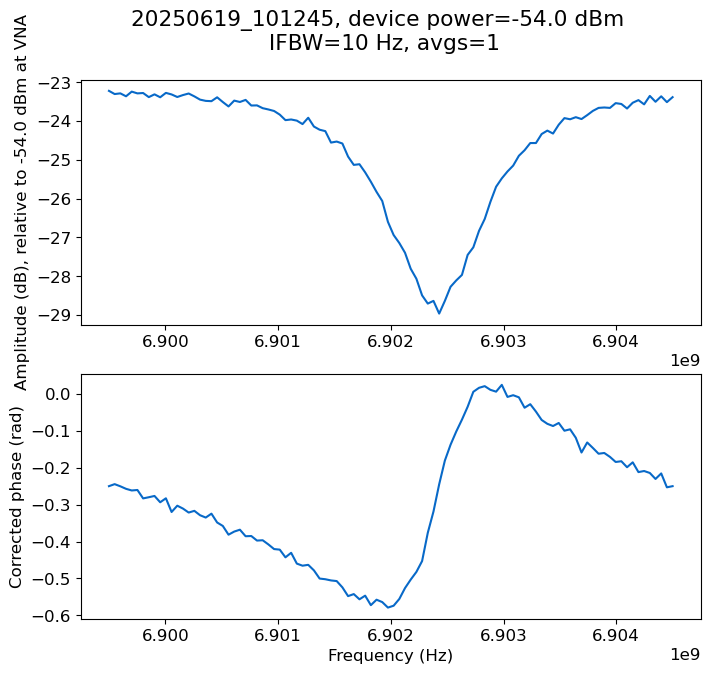

-53.5
Calculated line delay: -3.678754020828411e-07


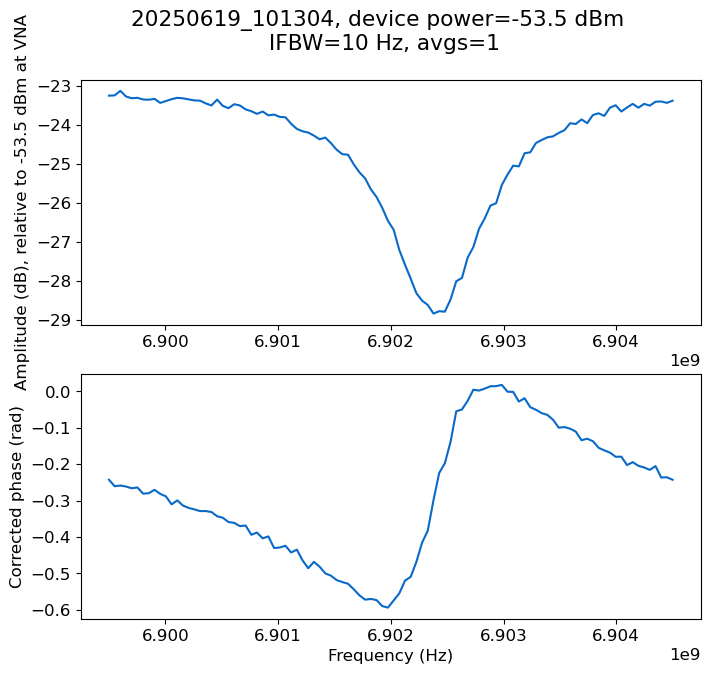

-53.0
Calculated line delay: -3.6905210765417287e-07


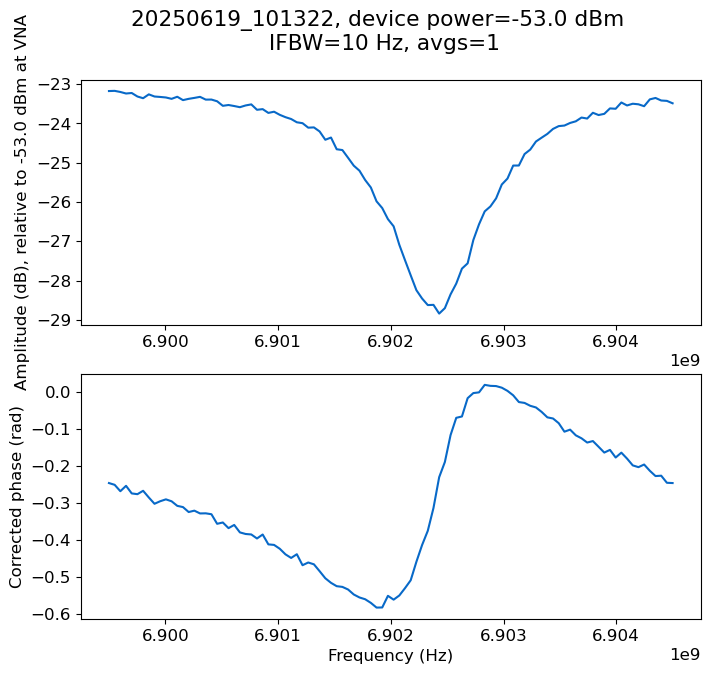

-52.5
Calculated line delay: -3.6703537111553617e-07


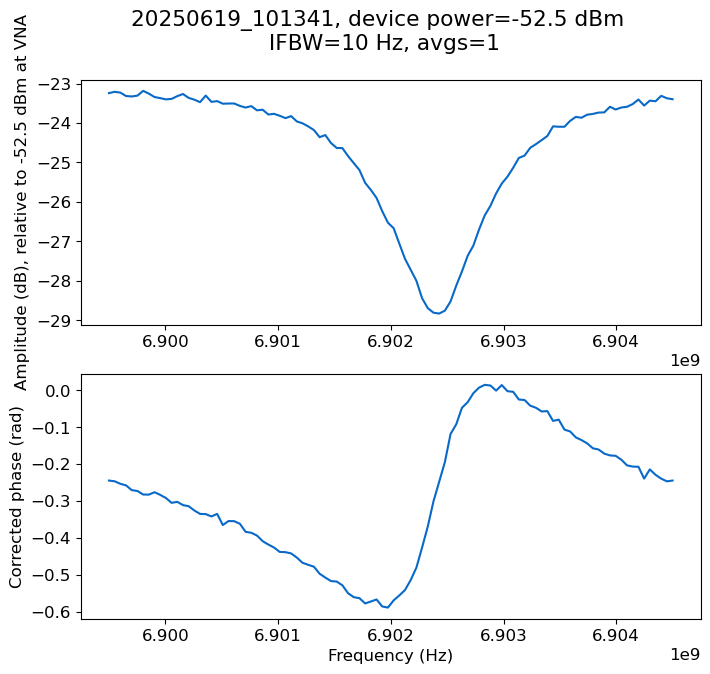

-52.0
Calculated line delay: -3.6326590196465904e-07


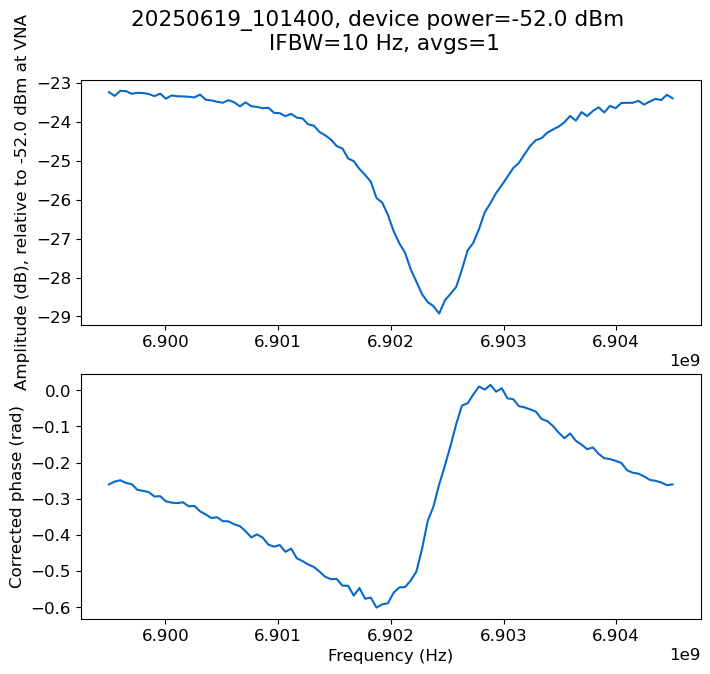

-51.5
Calculated line delay: -3.6731175064157734e-07


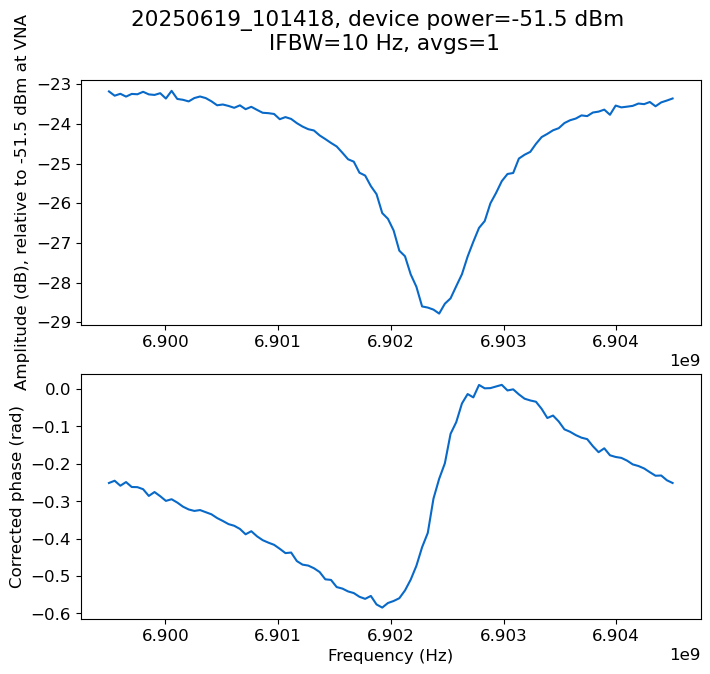

-51.0
Calculated line delay: -3.682711643884013e-07


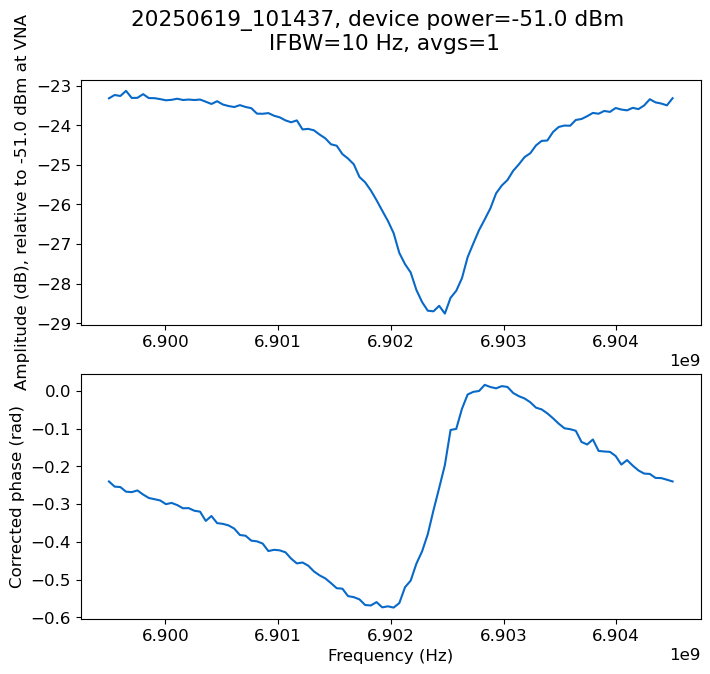

-50.5
Calculated line delay: -3.6952523404351946e-07


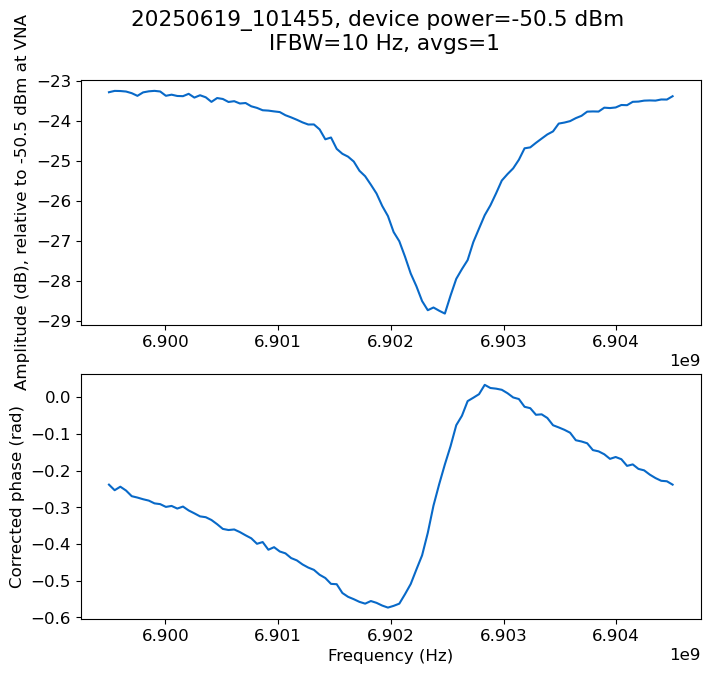

-50.0
Calculated line delay: -3.661304562646789e-07


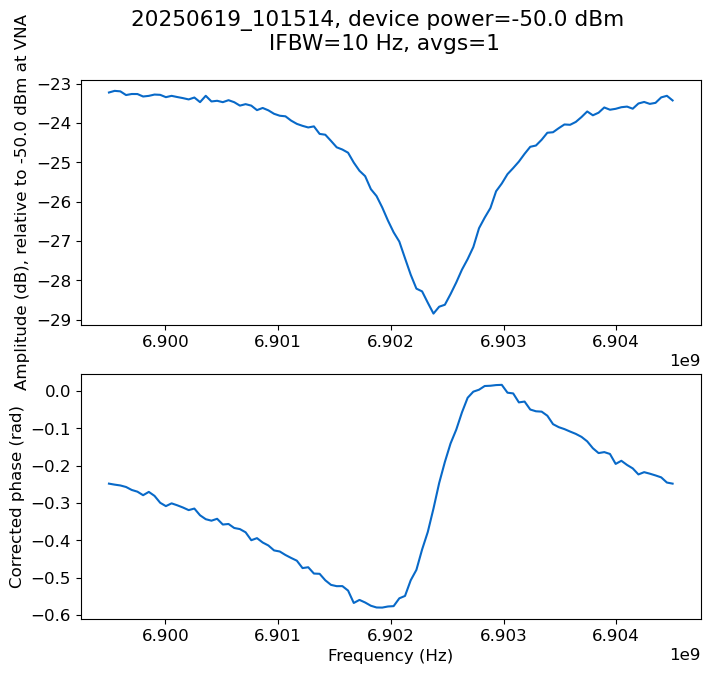

In [103]:
loop_data = []
npoints = 21 
power_vals = np.linspace(-60, -50, npoints)


freq_center = 6.902e9
fpoints=100
span = 5e6
expt_path = base_path
for p in power_vals: 
    print(p)
    scan_def = {'freq_center':freq_center, 
                'span':span,  
                'bandwidth':10, 
                'power':p, 
                'npoints':fpoints, 
                'averages':1}
    #file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
    file_name = 'buffer'
    data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, 's21')
    loop_data.append(data)


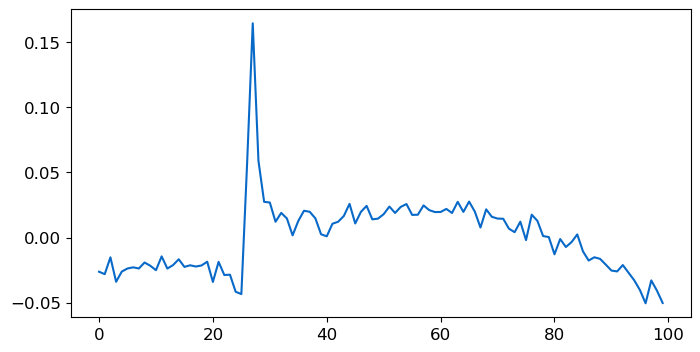

In [49]:
phase_data = np.unwrap(loop_data[0]['phases'])
poly = np.polyfit(loop_data[0]['freqs'],np.unwrap(loop_data[0]['phases']),1)
phase_data - np.polyval(poly,loop_data[0]['freqs'])

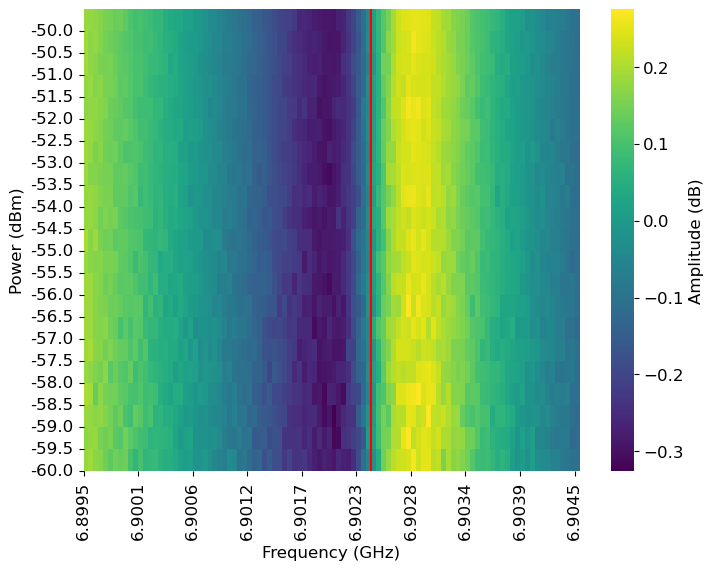

In [109]:
amps_2d = np.array([d['phases'] for d in loop_data])
# print(amps_2d.shape)

amps_2d = []
for d in loop_data:
    phase_data = np.unwrap(d['phases'])
    poly = np.polyfit(d['freqs'],np.unwrap(d['phases']),1)
    phase_data_corrected = phase_data - np.polyval(poly,d['freqs'])
    amps_2d.append(phase_data_corrected)

amps_2d = np.array(amps_2d)


freqs = np.linspace(freq_center-span/2, freq_center+span/2, fpoints)

plt.figure(figsize=(8, 6))

sns.heatmap(amps_2d, xticklabels=np.round(freqs/1e9, 4), yticklabels=np.round(power_vals, 1), cmap='viridis', cbar_kws={'label': 'Amplitude (dB)'})
plt.axvline(58,color='r')
plt.gca().invert_yaxis()
plt.xticks(ticks=np.linspace(0, len(freqs)-1, 10), labels=np.round(np.linspace(freqs[0]/1e9, freqs[-1]/1e9, 10), 4))
power_spacing = 1
plt.yticks(ticks=np.arange(len(power_vals)//power_spacing)*power_spacing, labels=np.round(power_vals[::power_spacing], 1))
plt.xlabel('Frequency (GHz)')
plt.ylabel('Power (dBm)')
plt.show()

In [93]:
waste_loop_data = loop_data

## Check resonances at one power

Calculated line delay: -4.1711520558816326e-07


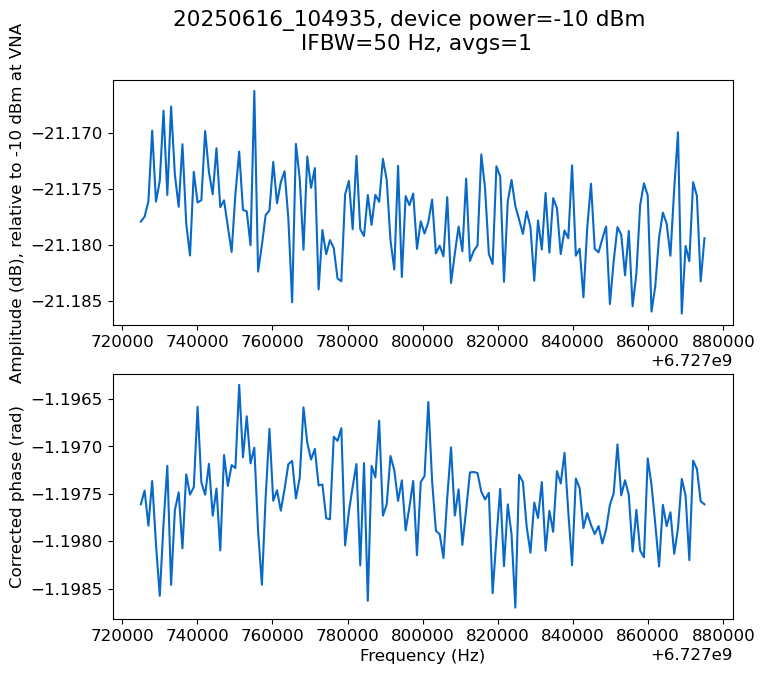

Calculated line delay: -4.1139408808953317e-07


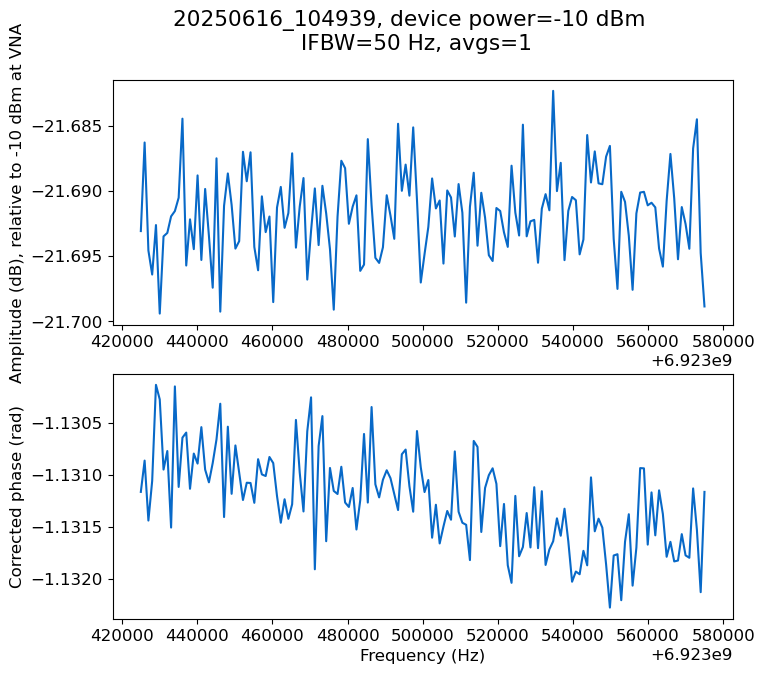

Calculated line delay: -4.1767648774778894e-07


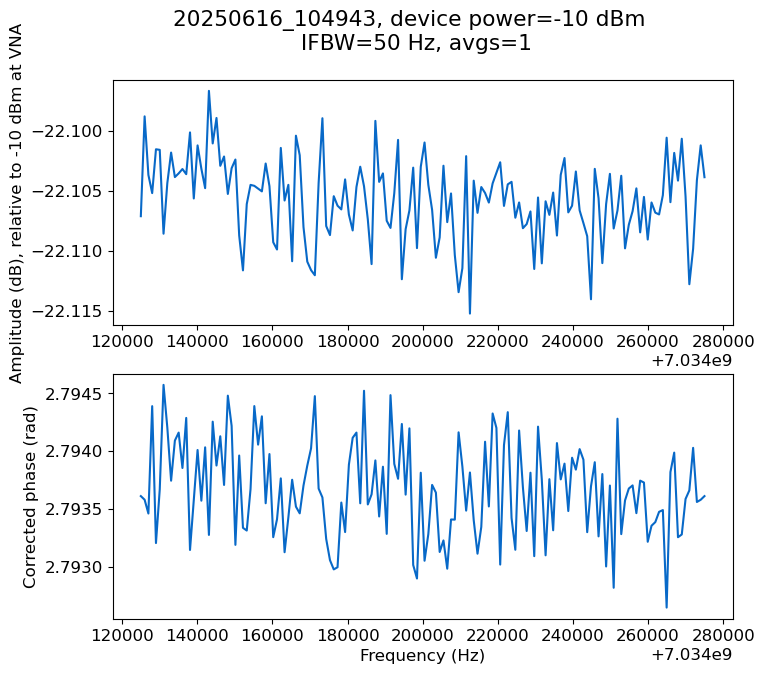

In [89]:
%matplotlib inline
expt_path = base_path
npoints = 150
span=0.15e6
power = -10

freqs = np.array([6.0175e+09, 6.3510e+09, 6.7120e+09, 7.0296e+09, 7.1744e+09, 7.5467e+09])
freqs =np.array([6.7278e+09, 6.9235e+09, 7.0342e+09])
bandwidth=50
avgs=1
for freq_center in freqs:     
    scan_def = {'freq_center':freq_center, 'span':span,  'bandwidth':bandwidth, 'power':power, 'npoints':npoints, 'averages':avgs}
    file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
    vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)

# Get the phase to correct with 

Calculated line delay: -8.263375470332096e-07


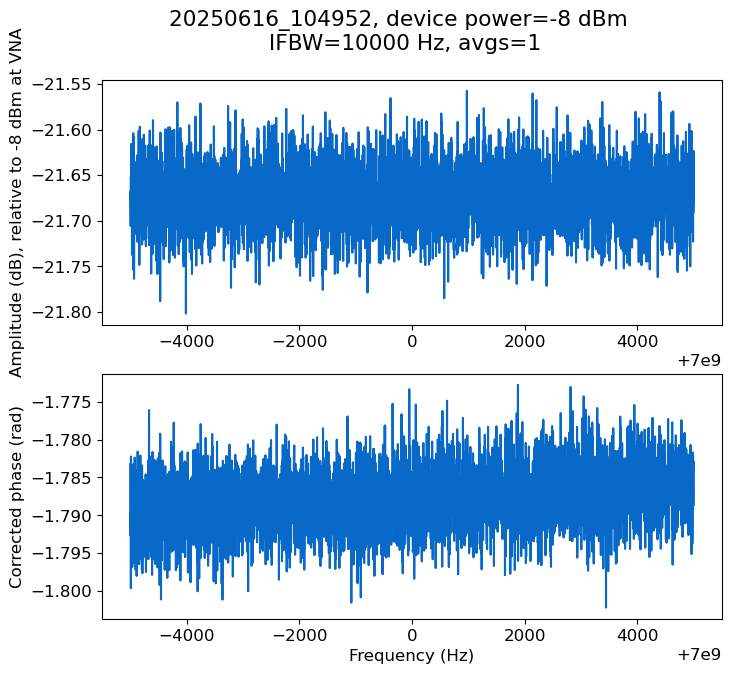

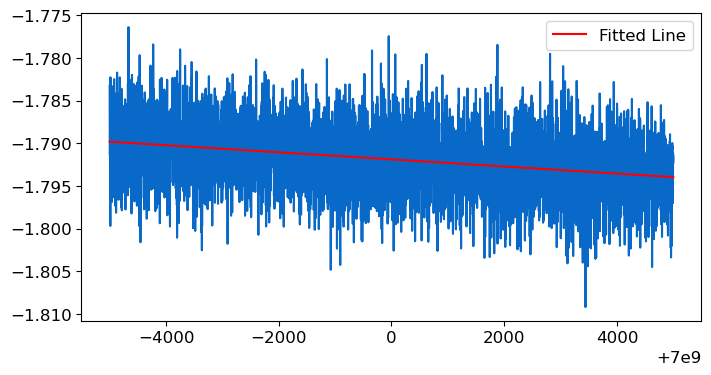

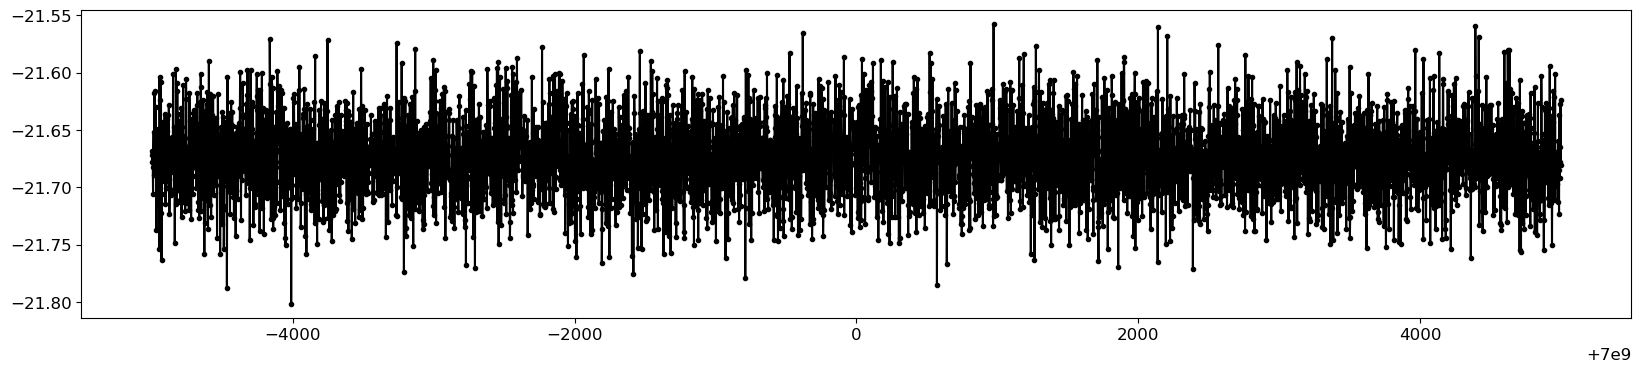

In [90]:
from scipy.stats import linregress

npoints = 5000
span=1e4
power = -8

bandwidth=10000
freq_center = 7e9
avgs=1    
scan_def = {'freq_center':freq_center, 'span':span,  'bandwidth':bandwidth, 'power':power, 'npoints':npoints, 'averages':avgs}
file_name = 'phase_check_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
data=vna_scan.do_vna_scan(VNA, file_name, base_path, scan_def, spar)

plt.figure()
plt.plot(data['freqs'], np.unwrap(data['phases']))

# Fit the data to a line
slope, intercept, r_value, p_value, std_err = linregress(data['freqs'], np.unwrap(data['phases']))

# Plot the fitted line
plt.plot(data['freqs'], slope * data['freqs'] + intercept, label='Fitted Line', color='red')
plt.legend()
plt.show()


plt.figure(figsize=(20, 4))
plt.plot(data['freqs'], data['amps'],'k.-')
#config.update_config(cfg_path, 'readout', qi, 'phase_const', slope)

In [92]:
slope

-4.1545782482711315e-07

In [79]:
spar

's43'

# Run all these cells to do power sweep

## Broad frequency scan looking for resonances 

In [4]:
expt_path = base_path
span=40e6
power = 0
avgs = 3
d=[]
bandwidth=5000
freq_min=5.6e9
freq_max = 8.2e9 
nscans = int(np.ceil((freq_max - freq_min)/span))
for i in range(nscans):
    freq_center = freq_min + i*span
    scan_def = {'freq_center':freq_center, 
                'span':span,  
                'bandwidth':bandwidth, 
                'power':power, 
                'npoints':7000, 
                'averages':avgs}
    file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
    d.append(vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar, plot=False))

In [7]:
dd = helpers.concat_scans(d)
dd['amps'] = helpers.make_lin(dd['amps'])
%matplotlib qt
plt.figure()
plt.plot(dd['freqs'],dd['amps'])

In [8]:
dd_db = helpers.concat_scans(d)
plt.figure()
plt.plot(dd_db['freqs'],dd_db['amps'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Amplitude (dB)')
plt.savefig(os.path.join(expt_path, 'amp_vs_freq_4.png'))

In [9]:
dd_db = helpers.concat_scans(d)
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plt.figure()
phases = dd_db['phases']
freqs = dd_db['freqs']
# Fit phases to a line
fit = np.polyfit(freqs, np.unwrap(phases), 1)
phases_corrected = np.unwrap(phases) - np.polyval(fit, freqs)
ax[0].plot(freqs, dd_db['amps'])

ax[1].plot(freqs, phases_corrected)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Phase')


Text(0, 0.5, 'Phase')

In [13]:
data = helpers.find_peaks(dd, 0.0075)
print(len(data['coarse_peaks']))
res_list = data['coarse_peaks']


50


In [36]:
res_list

array([6.0052e+09, 6.3681e+09, 6.8334e+09, 7.4816e+09, 7.9149e+09,
       7.9759e+09])

In [ ]:
res_list = [6.0041e+09, 6.3699e+09, 6.8344e+09, 7.51e+09, 7.5420e+09, 7.9140e+09,7.9240e+09]

[6.0052e+09 6.3681e+09 6.8334e+09 7.4816e+09]


In [ ]:
[6.0052e+09, 6.3681e+09, 6.8334e+09, 7.4816e+09, 7.5471e+09, 7.9149e+09, 7.9771e+09]

In [28]:
res_list = data['coarse_peaks']
#res_list = data['coarse_peaks'][0:6]

In [ ]:

res_list = np.delete(res_list, 2)

In [29]:
res_list = np.append(res_list, 7.072e9)
res_list = np.append(res_list, 7.54e9)

## Medium width scan checking each resonance 
Saves the minimum value of transmission to res_freqs for narrower scan next. 

Calculated line delay: -4.052334018720435e-07


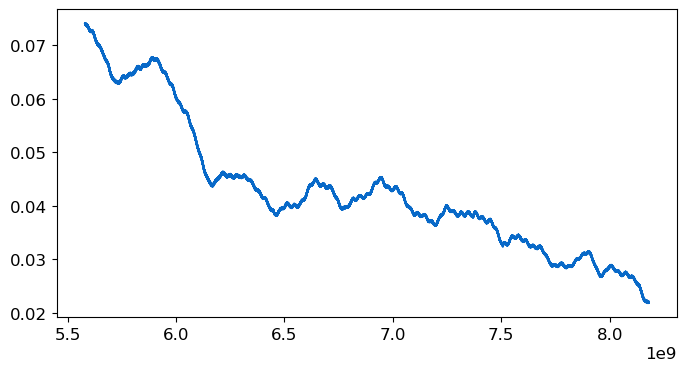

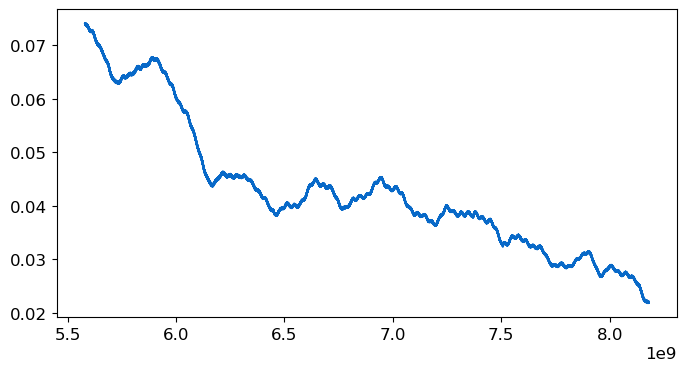

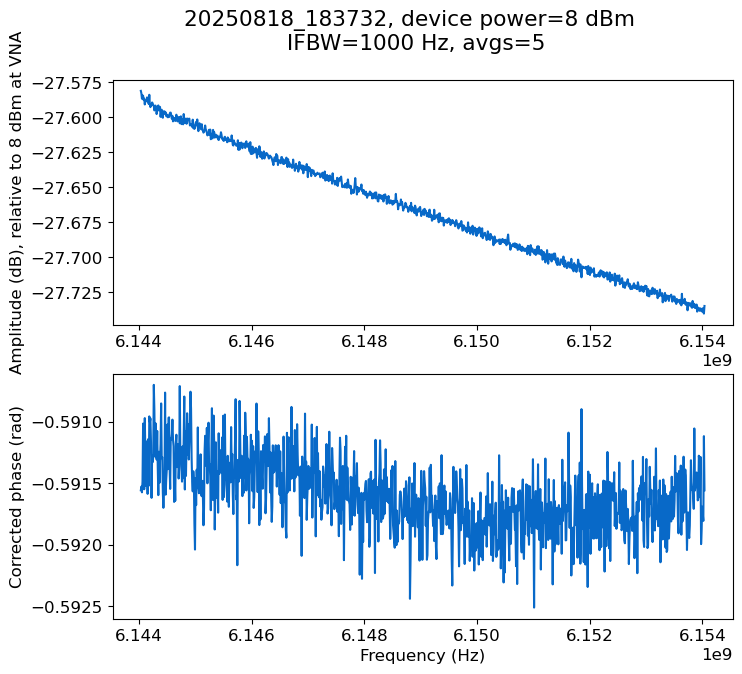

Calculated line delay: -4.041191505666764e-07


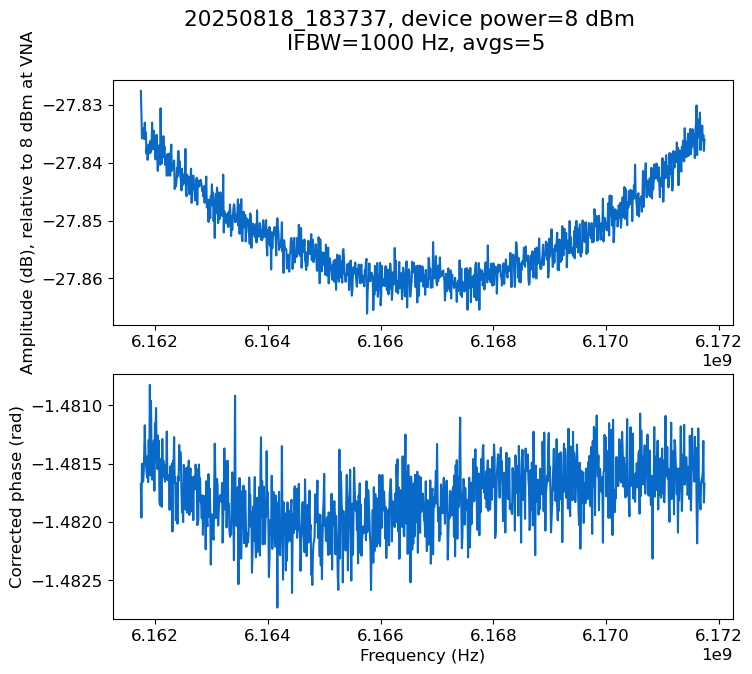

Calculated line delay: -4.0614697452736203e-07


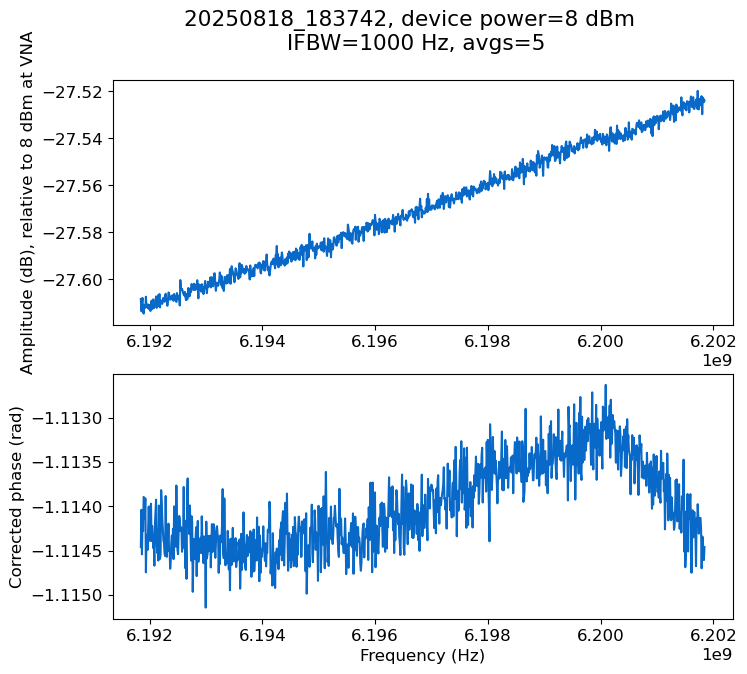

Calculated line delay: -4.0839085584129054e-07


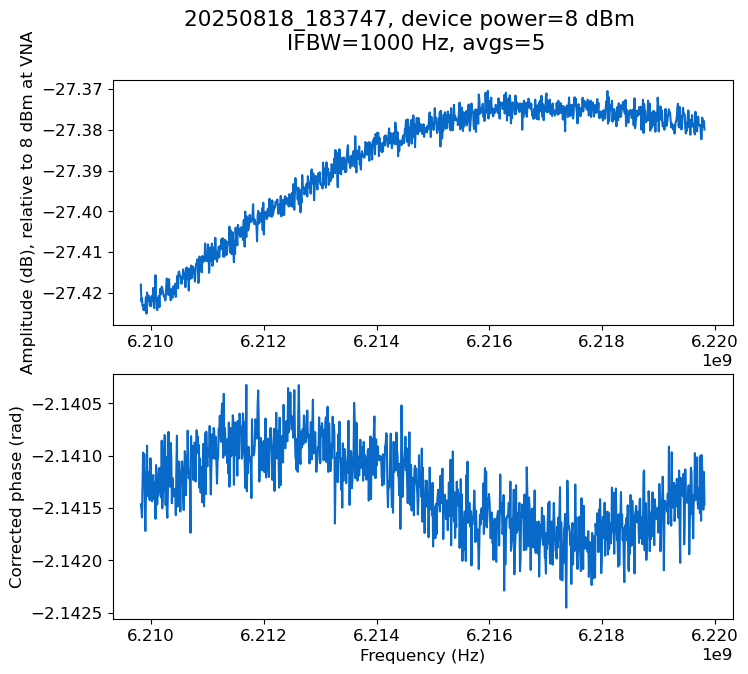

Calculated line delay: -4.070076954683465e-07


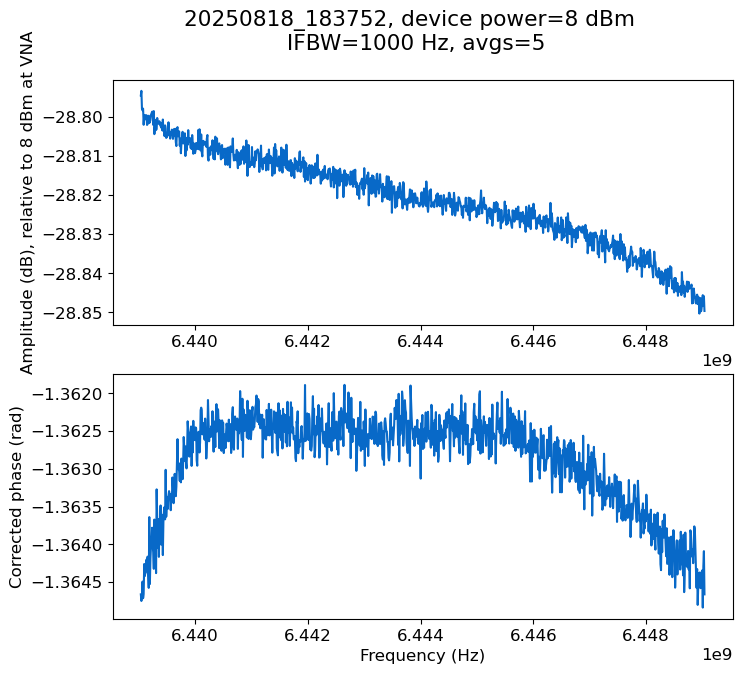

Calculated line delay: -4.08122572638211e-07


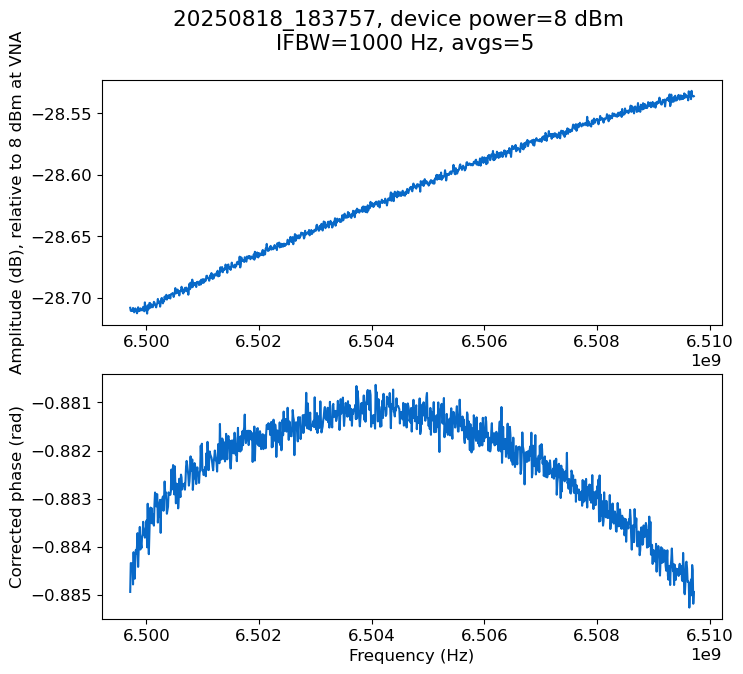

Calculated line delay: -4.052978509554101e-07


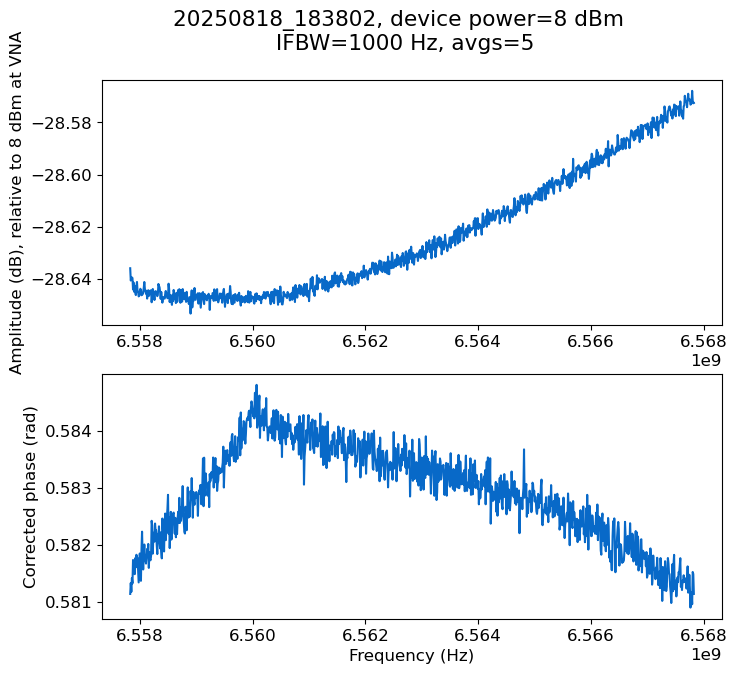

Calculated line delay: -4.089322632784203e-07


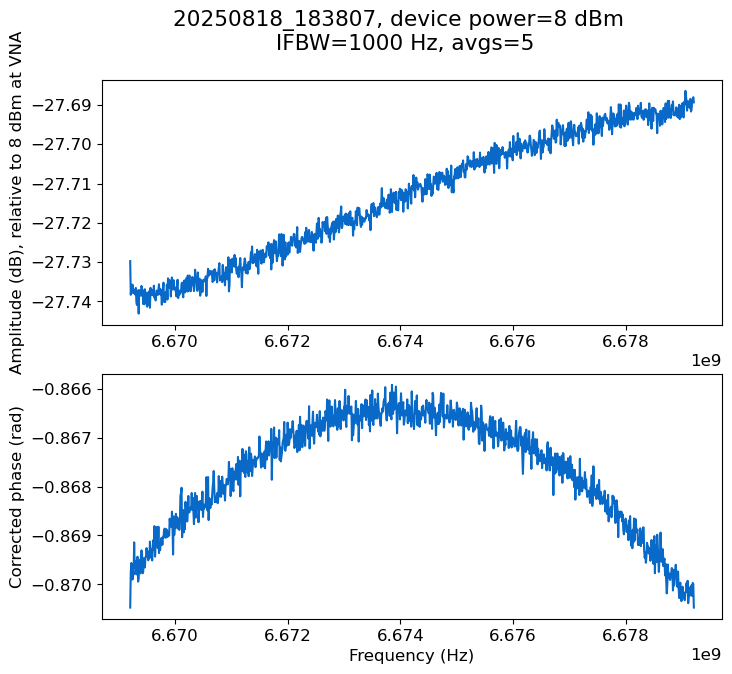

Calculated line delay: -4.069451605012554e-07


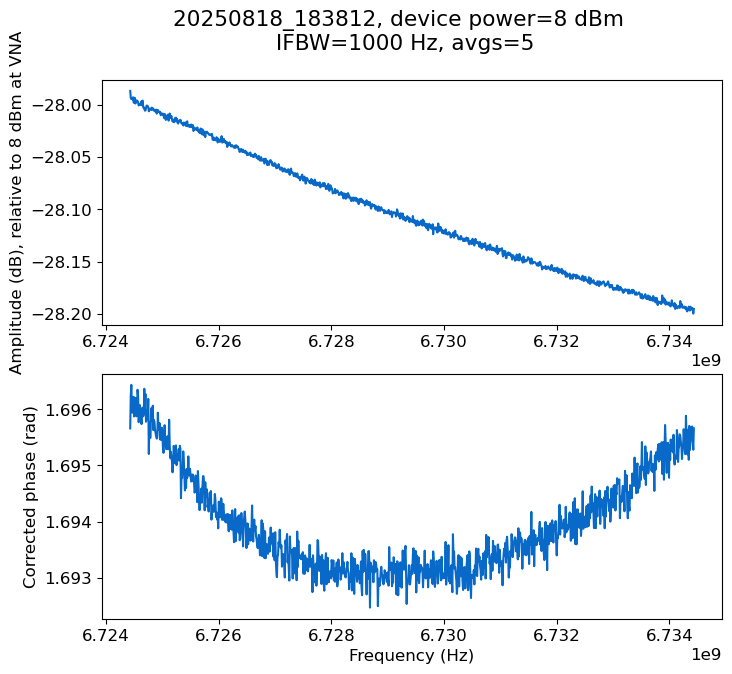

Calculated line delay: -4.0755264585921977e-07


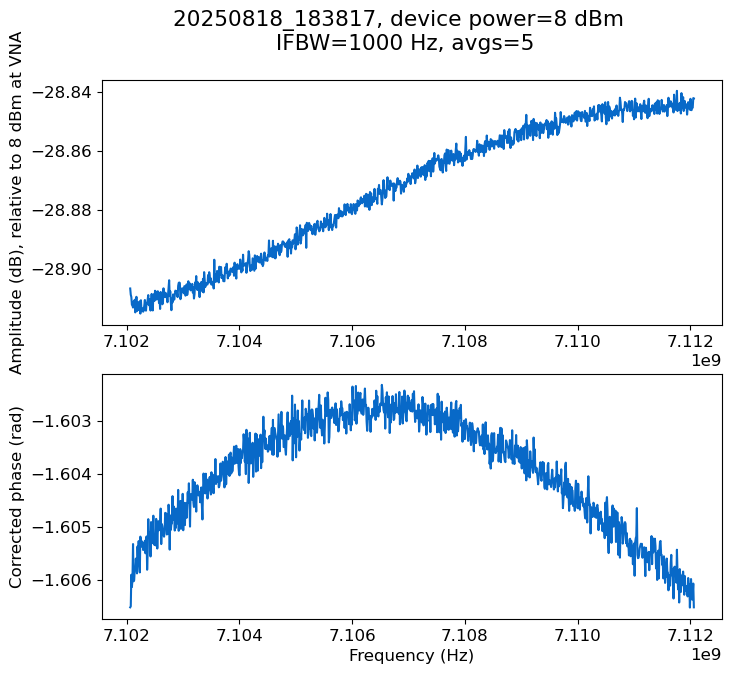

Calculated line delay: -4.0801834191438614e-07


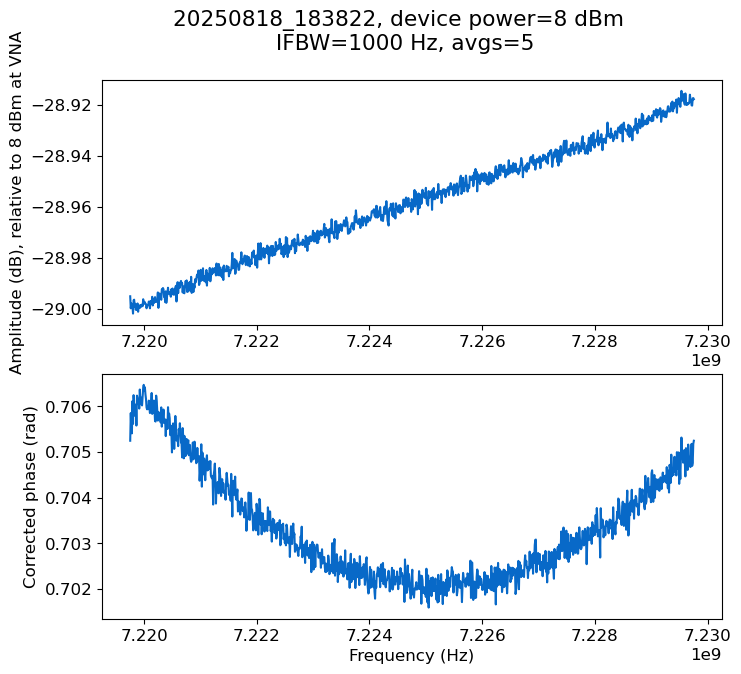

Calculated line delay: -4.073541534533136e-07


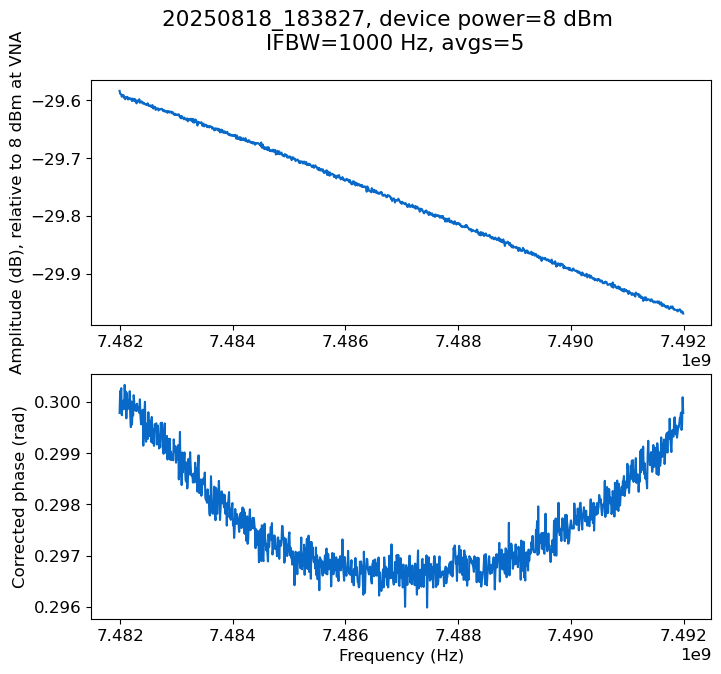

Calculated line delay: -4.049630788840782e-07


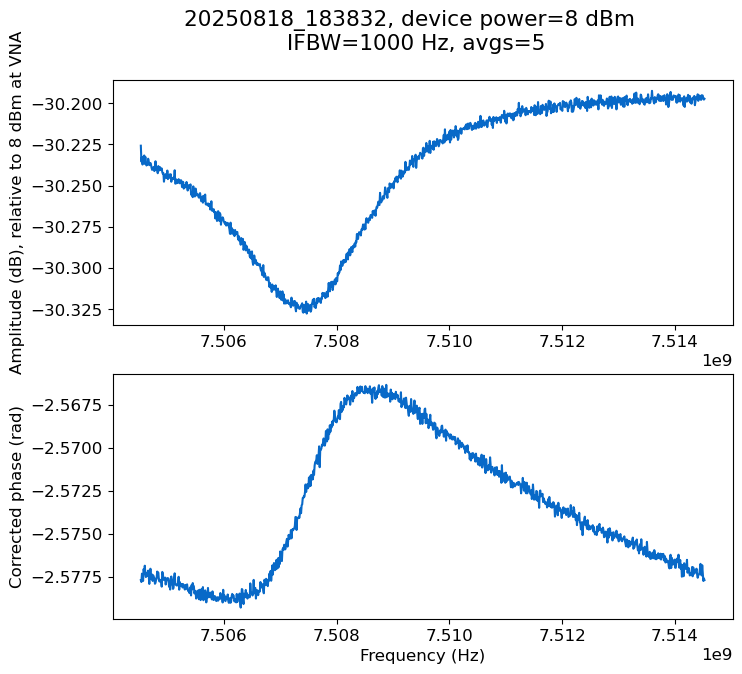

Calculated line delay: -4.05900718558166e-07


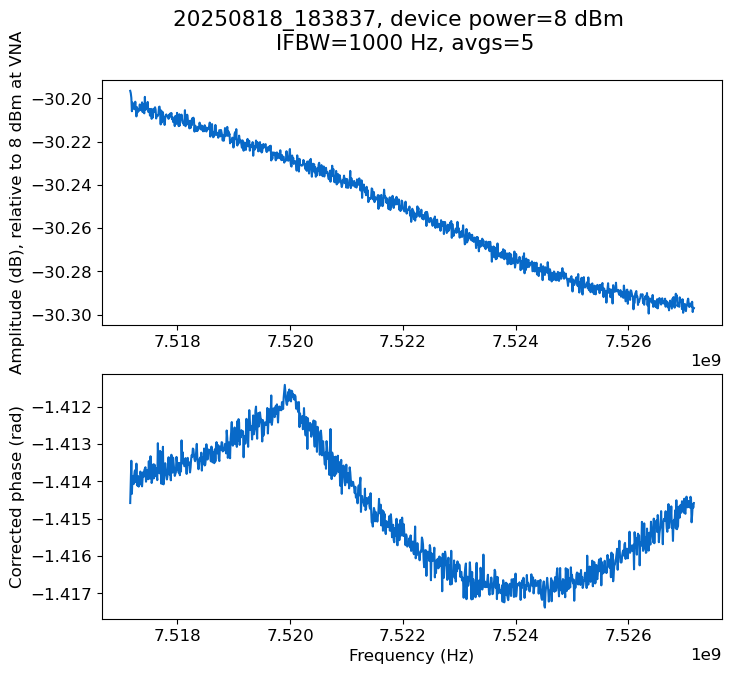

Calculated line delay: -4.0827448549055506e-07


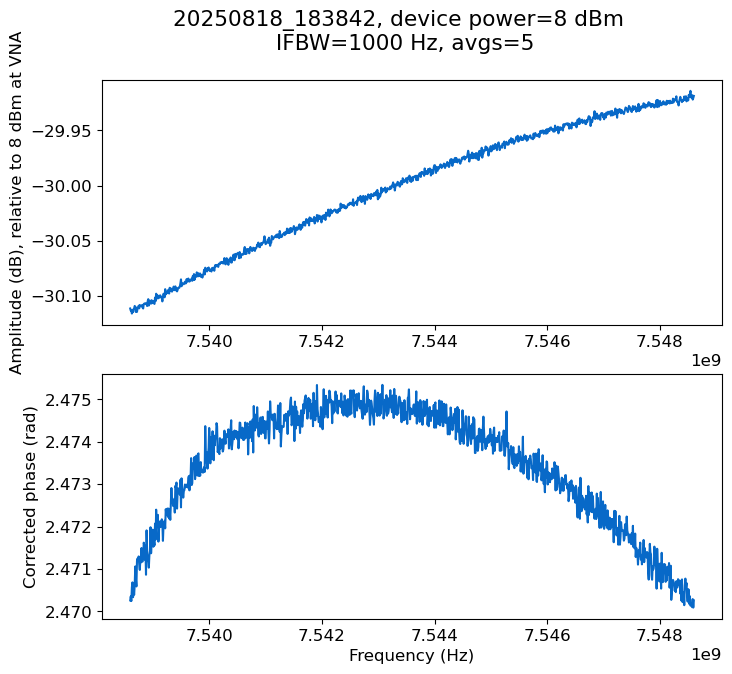

Calculated line delay: -4.106403592559432e-07


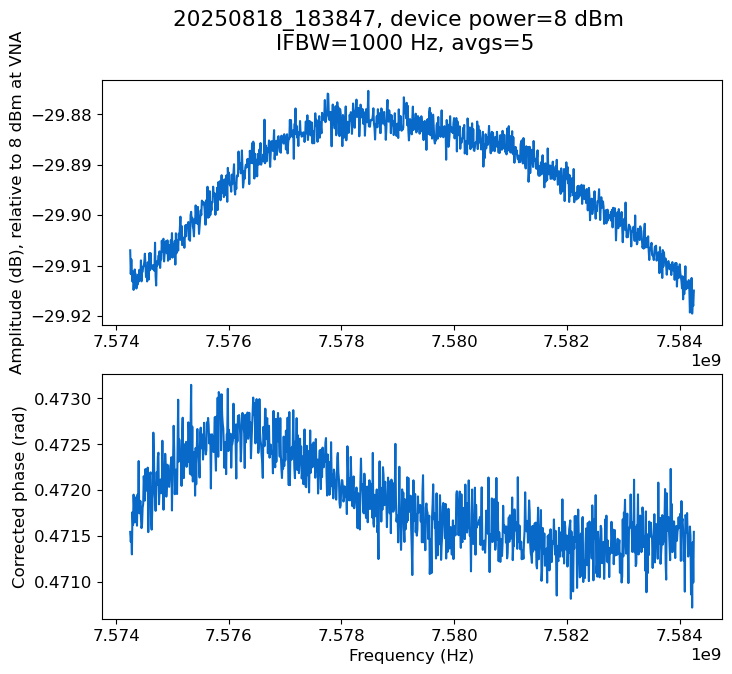

Calculated line delay: -4.103553198384984e-07


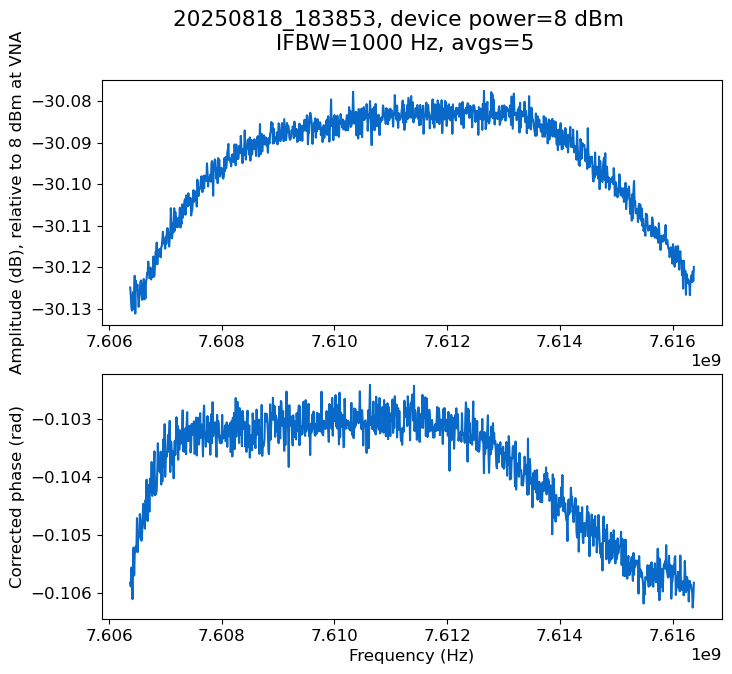

KeyboardInterrupt: 

In [14]:
%matplotlib inline
expt_path = base_path
span=10e6
res_freqs =[]
power=0
temp=0.01

#res_list = [6.0019e+09, 6.3237e+09, 6.6835e+09, 6.9680e+09, 7.0085e+09, 7.2388e+09,
# 7.6043e+09, 7.9797e+09]
for freq_center in res_list:
    scan_def = {'freq_center':freq_center, 'span':span,  'bandwidth':1000, 'power':8, 'npoints':1000, 'averages':5}
    file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm_' + str(temp) + 'K'
    data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)
    res_freqs.append(data['freqs'][np.argmin(data['amps'])])

In [ ]:
np.array(res_freqs

array([6.0052e+09, 6.3681e+09, 6.8334e+09, 7.4816e+09, 7.5471e+09,
       7.9149e+09, 7.9337e+09])

In [43]:
res_freqs=[6004131546.5352,
 6369912992.736702,
 6834449597.617353,
 7509237578.023416,
 7541976976.976977,
 7914012205.965133,]

res_freqs=[
 7541976976.976977,
 7914012205.965133,]

## Narrower scan before power sweep

Calculated line delay: -3.459162186629177e-07


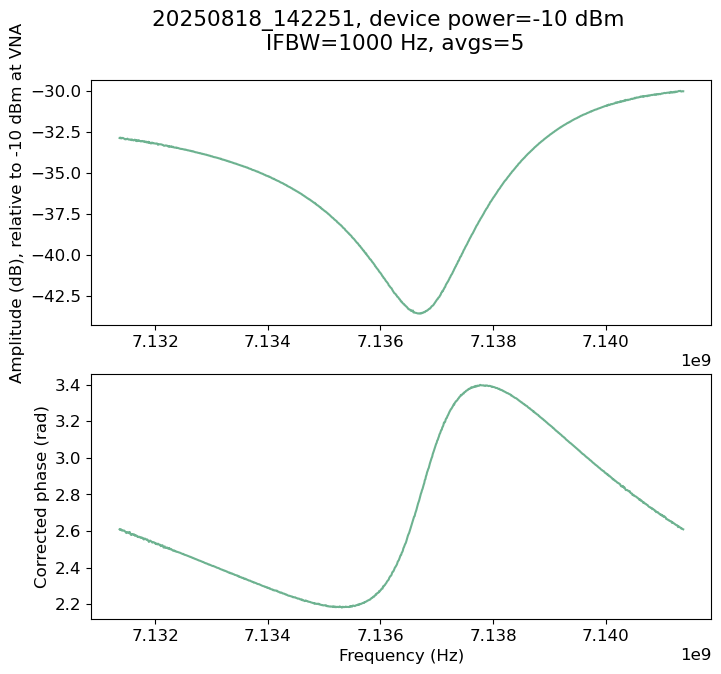

Calculated line delay: -3.4868082495286516e-07


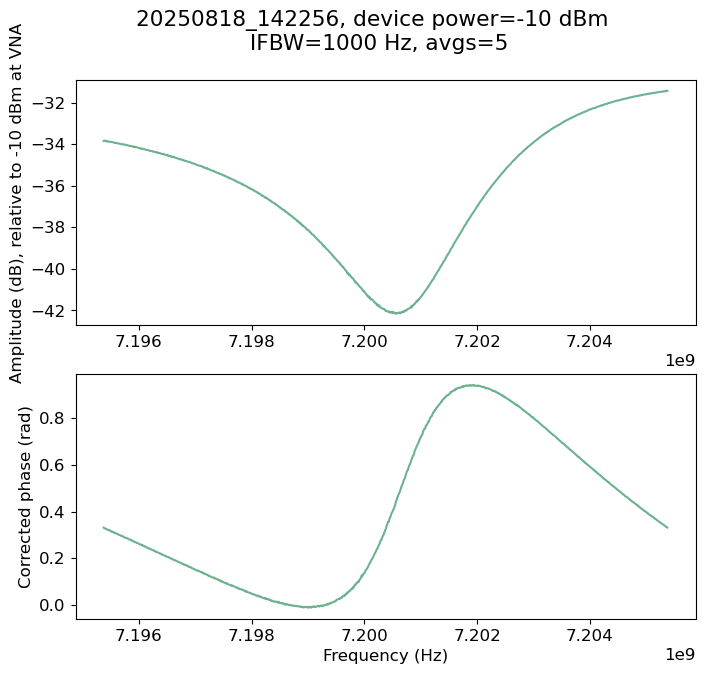

In [71]:
freq_list =[]
import copy 
scan_def['span']=10e6
scan_def['power']=-10
for res in res_freqs:
    scan_def['freq_center'] = res
    file_name = 'res_' + str(scan_def['freq_center'])[:7] + '_' + str(power)[1:] + 'dbm'
    data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)
    freq_list.append(data['freqs'][np.argmin(data['amps'])])
res_freqs=copy.deepcopy(freq_list)

In [103]:
res_list=res_list[0:-1]
print(res_list)

[6.0019e+09 6.3237e+09 6.6835e+09 6.9680e+09 7.0085e+09 7.2388e+09
 7.6043e+09 7.9797e+09]


In [62]:
res_list

[7500000000.0, 7570000000.0, 7670000000.0, 7770000000.0]

In [91]:
res_freqs[-1:]

[7914905005.005005]

# Power sweep

Comment saved to C:/_Data/Resonators/20250818-S042A\power_sweep_20250818_142302\comment.txt


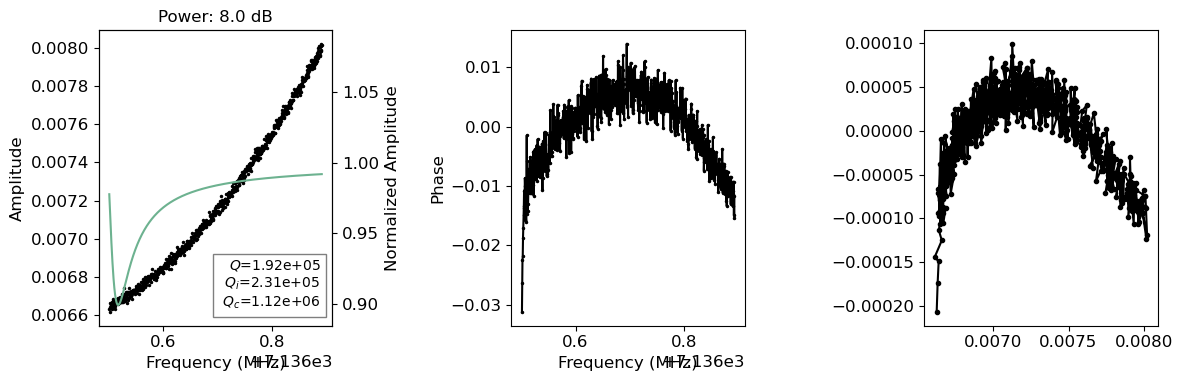

7136501705.091649


Time elapsed: 0.40 min, expected time: 0.20 min


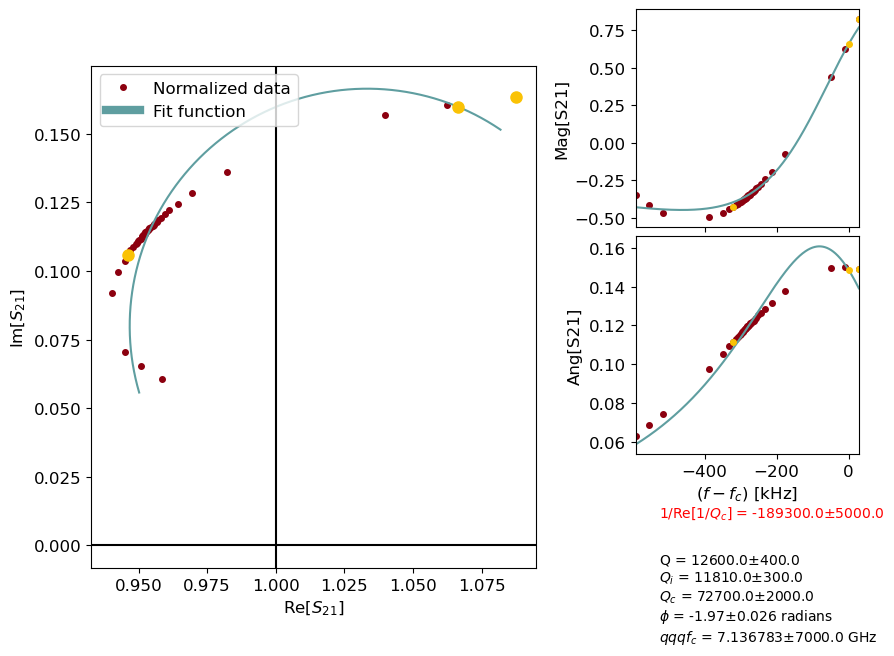

Saved fit results for frequency 7136.625000 MHz, power 8 dBm to CSV
Averaging factor: 0.001
Pin -57.0, N photons: 5.06e+06, navg: 0
Next time: 0.00 min, q_adj: 0.900
7136395661.616269


KeyboardInterrupt: 

In [72]:
#freq_list = res_list[5:]
#freq_list=res_freqs
#freq_list = res_freqs[-1:]
#freq_list = [6004000869.385187]
slope=0

# #JPA
# freq_list = [6004145045.045045,
#  6369915015.015015,
#  6834455055.055055,
#  7509234234.234234,
#  7541984984.984985,
#  7914015015.015015,
#  7922753753.753754]

#slab

# , 7.5471e+09,
#        7.9149e+09
#freq_list = [6.0052e+09, 6.3681e+09, 6.8334e+09, ]

# freq_list = [6.0052e+09]
freq_list = res_freqs
att = 65 #102#-25.57
nvals = 7
for i in range(1):
    custom_config = {"freqs":np.array(freq_list), 
                 "att":att,
                 'type':'single',#'single , lin',
                 'base_path':base_path, 
                 'bandwidth':100,
                 "db_slope":8,
                 'slope':slope,
                 "span_inc":10,
                 'nvals':nvals,
                 "pow_start":8,
                 "avg_corr":10,#0.12,#12,
                 'spar':spar,
                 'npoints':25, 
                 'pow_inc':-4, 
                 'comment':'first try'}
#custom_config = {"freqs":np.array(freq_list), "att":50,'type':'lin','base_path':base_path, 'nvals':21,"pow_start":0}
    # Update default config with custom values
    config = vna_measurement.get_default_power_sweep_config(custom_config)
    results = vna_measurement.power_sweep_v2(config, VNA)
    vna_measurement.write_hp_csv(results, config)


## Fast version

Comment saved to G:/My Drive/Projects/Materials/Data/250602-ResSil6TaSQ/power_sweep_20250603_143249\comment.txt


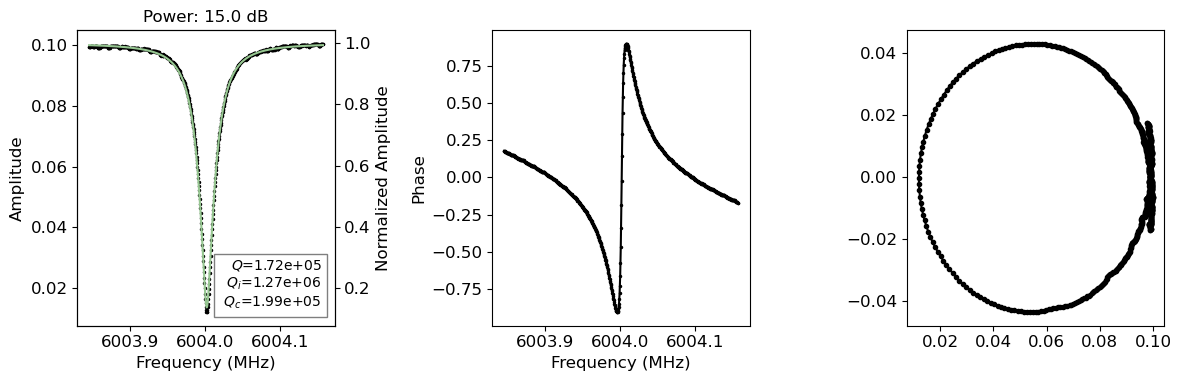

KeyboardInterrupt: 

In [42]:
freq_list = [6004000869.385187,
 6328492134.887255,
 6681207832.048611,
 7026329179.82658,
 7247004608.422264,
 7604966331.446795,
 8017990990.990991]

custom_config = {"freqs":np.array(freq_list), 
                "att":72,
                'type':'lin',#'single , lin',
                'base_path':base_path, 
                'bandwidth':100,
                "db_slope":5,
                'slope':slope,
                "span_inc":8,
                'nvals':8,
                "pow_start":15,
                "avg_corr":0.05,
                'spar':spar,
                'npoints':75, 
                'pow_inc':-4, 
                'comment':'125 mK'}
#custom_config = {"freqs":np.array(freq_list), "att":50,'type':'lin','base_path':base_path, 'nvals':21,"pow_start":0}
    # Update default config with custom values
config = vna_measurement.get_default_power_sweep_config(custom_config)
results = vna_measurement.power_sweep_v2(config, VNA)
vna_measurement.write_hp_csv(results)


In [29]:
vna_measurement.new_hp_csv(config['base_path'])

In [ ]:


qhp_list = []
for i in range(len(results.measurements)):
    q_int = [results.measurements[i][j].q_internal for j in range(len(results.measurements[i]))]
    qhp = np.max(q_int)
    qhp_list.append(qhp)

plt.figure(figsize=(8, 7))
plt.semilogy(qhp_list, 'o')
qhp_list
# Create an empty CSV file with headers if it doesn't exist
fname = os.path.join(config['base_path'], 'qhp.csv')
 # Adjust headers as needed
with open(fname, mode='a', newline='') as file:
    writer = csv.writer(file)
    now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    writer.writerow([now] + qhp_list)


## Power sweep just 1

In [ ]:
# 1
freq_list = [7029727828.725843,]

 # 1
#freq_list = [
# 6876720085.042521]
slope = -4.1534052061318027e-07 # 1 
#slope=0
#freq_list = [8045895572.786393]
# 2
#freq_list = [6727757253.626813, 6923469659.829915, 7034221985.992996, 8068307578.789394] # 2 
#freq_list = [8068307578.789394]
#slope = -4.6912118164934637e-07
#freq_list= [7034221985.992996]

# 3
# freq_list = [6015457003.501751,
#  6355251900.950475,
#  6712772761.38069,
#  #6859872161.080541,
#  7028836743.371686,
#  7163106428.2141075,
#  7543248049.024512,
#  8041999124.562282]
 # single, linear 
 # 001
custom_config = {"freqs":np.array(freq_list), 
                 "att":65,
                 'type':'lin',#'single , lin',
                 'base_path':base_path, 
                 'bandwidth':100,
                 "db_slope":7,
                 'slope':slope,
                 "span_inc":8,
                 'nvals':10,
                 "pow_start":10,
                 "avg_corr":0.1,
                 'spar':spar,
                 'npoints':100, 
                 'pow_inc':-4, 
                 'comment':'365 mK, 10 data points, warming'}
#custom_config = {"freqs":np.array(freq_list), "att":50,'type':'lin','base_path':base_path, 'nvals':21,"pow_start":0}
    # Update default config with custom values
config = vna_measurement.get_default_power_sweep_config(custom_config)
print(config)
results = vna_measurement.power_sweep_v2(config, VNA)